<a href="https://colab.research.google.com/github/jiku100/2020-2-machine-running-proejct/blob/master/assignment9/%EC%8B%A0%EC%84%9D%EA%B2%BD_assignment_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification for Multiple Categories using Pytorch**



# 1. Import library
<hr>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


# 2. Load Data
<hr>

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,)),  # mean value = 0.1307, standard deviation value = 0.3081
])

In [4]:
data_path = './MNIST'

training_set = datasets.MNIST(root = data_path, train= True, download=True, transform= transform)
testing_set = datasets.MNIST(root = data_path, train= False, download=True, transform= transform)

In [18]:
batch_32 = 32
batch_64 = 64
batch_128 = 128
learning_rate_value = 1e-2

In [6]:
train_loader_32 = DataLoader(dataset = training_set, batch_size = batch_32, shuffle = True) ## batch size 32 짜리 train loader 생성
test_loader_32 = DataLoader(dataset = testing_set, batch_size = batch_32, shuffle = True) ## batch size 32 짜리 test loader 생성

train_loader_64 = DataLoader(dataset = training_set, batch_size = batch_64, shuffle = True) ## batch size 64 짜리 train loader 생성
test_loader_64 = DataLoader(dataset = testing_set, batch_size = batch_64, shuffle = True) ## batch size 64 짜리 test loader 생성

train_loader_128 = DataLoader(dataset = training_set, batch_size = batch_128, shuffle = True) ## batch size 128 짜리 train loader 생성
test_loader_128 = DataLoader(dataset = testing_set, batch_size = batch_128, shuffle = True) ## batch size 128 짜리 test loader 생성

Target: 7


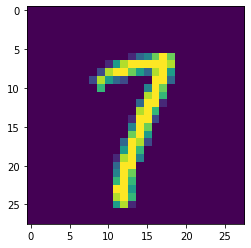

In [7]:
for X, Y in train_loader_32:
  plt.imshow(X[0][0].numpy())
  print(f"Target: {Y[0]}")
  break

# 3. Define Model
<hr>

In [8]:
class classification(nn.Module):
    def __init__(self):
        super(classification, self).__init__()
        
        # construct layers for a neural network
        self.classifier1 = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=20*20),
            nn.Sigmoid(),
        ) 
        self.classifier2 = nn.Sequential(
            nn.Linear(in_features=20*20, out_features=10*10),
            nn.Sigmoid(),
        ) 
        self.classifier3 = nn.Sequential(
            nn.Linear(in_features=10*10, out_features=10),
            nn.LogSoftmax(dim=1),
        ) 
        
        
    def forward(self, inputs):                 # [batchSize, 1, 28, 28]
        x = inputs.view(inputs.size(0), -1)    # [batchSize, 28*28]
        x = self.classifier1(x)                # [batchSize, 20*20]
        x = self.classifier2(x)                # [batchSize, 10*10]
        out = self.classifier3(x)              # [batchSize, 10]
        
        return out


In [9]:
classifier_32 = classification().to(device)
classifier_64 = classification().to(device)
classifier_128 = classification().to(device)

In [19]:
## Loss function
criterion = nn.NLLLoss()

# Optimization
optimizer = torch.optim.SGD(classifier_32.parameters(), lr=learning_rate_value)

# 4. Training
<hr>

In [12]:
training_epochs = 60
total_batch_32 = len(train_loader_32)
total_batch_64 = len(train_loader_64)
total_batch_128 = len(train_loader_128)

In [22]:
def training(model, loss, optim, training_epochs, total_batch, train_loader, test_loader):
  L_iters = []
  accuracy = []
  for epoch in range(training_epochs):
    total_cost_train = 0
    total_cost_test = 0
    for (X, Y), (X_test, Y_test) in zip(train_loader, test_loader):
      X = X.to(device)
      Y = Y.to(device)

      optim.zero_grad()
      train_pred = model(X)
      cost = loss(train_pred, Y)
      cost.backward()
      optim.step()
      total_cost_train += cost

      with torch.no_grad():
        X_test = X_test.to(device)
        Y_test = Y_test.to(device)
        test_pred = model(X_test)
        cost_test = loss(test_pred, Y_test)
        total_cost_test += cost_test

    avg_cost_train = total_cost_train / total_batch
    avg_cost_test = total_cost_test / total_batch
    L_iters.append(avg_cost_train)
    print("Epoch: %02d Training Loss: %.9f Testing Loss: %.9f" %((epoch + 1),avg_cost_train, avg_cost_test))
  return L_iters, accuracy

In [23]:
L_32, A_32 = training(classifier_32, criterion, optimizer, training_epochs, total_batch_32, train_loader_32, test_loader_32)

Epoch: 01 Training Loss: 0.334660739 Testing Loss: 0.333807379
Epoch: 02 Training Loss: 0.301364094 Testing Loss: 0.300448388
Epoch: 03 Training Loss: 0.264837235 Testing Loss: 0.261980504


KeyboardInterrupt: ignored

In [ ]:
for (X, Y), (X_test, Y_test) in zip(train_loader_32, test_loader_32):
  print(X[0][0])
  print(Y[0])
  print(X_test[0][0])
  print(Y_test[0])
  break